In [4]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np #numpy
import pandas as pd #pandas
#Importamos la base de datos
data = pd.read_csv('age_gender.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:

## Converting pixels into numpy array
data['pixels']=data['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [5]:
print('Total rows: {}'.format(len(data)))
print('Total columns: {}'.format(len(data.columns)))

Total rows: 23705
Total columns: 5


In [6]:
## normalizing pixels data
data['pixels'] = data['pixels'].apply(lambda x: x/255)

## calculating distributions
age_dist = data['age'].value_counts()

In [7]:
X = np.array(data['pixels'].tolist())

In [9]:
## Converting pixels from 1D to 3D

X = X.reshape(X.shape[0],48,48,1)

In [10]:
from sklearn.model_selection import train_test_split
y = data['age']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=37)

In [11]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(128, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='relu')
])

sgd = tf.keras.optimizers.SGD(momentum=0.9)

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])


## Stop training when validation loss reach 110
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<110):
            print("\nReached 110 val_loss so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                        

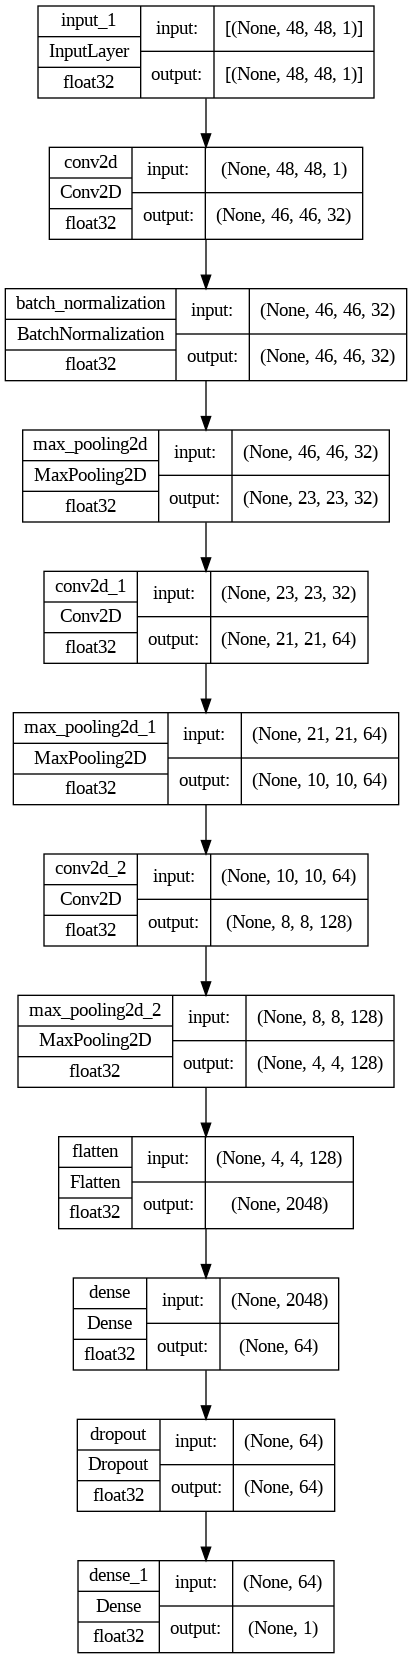

In [12]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True, show_dtype = True)

In [18]:
history = model.fit(
    X_train, y_train, epochs=15, validation_split=0.1, batch_size=64
)

Epoch 1/15
260/260 [==============================] - 73s 282ms/step - loss: 128.1576 - mae: 8.3263 - val_loss: 96.3866 - val_mae: 7.0932
Epoch 2/15
260/260 [==============================] - 73s 279ms/step - loss: 119.1317 - mae: 8.0613 - val_loss: 118.1924 - val_mae: 8.2836
Epoch 3/15
260/260 [==============================] - 73s 281ms/step - loss: 116.7919 - mae: 7.9320 - val_loss: 113.3662 - val_mae: 7.5933
Epoch 4/15
260/260 [==============================] - 72s 277ms/step - loss: 110.3186 - mae: 7.7311 - val_loss: 125.4886 - val_mae: 8.0192
Epoch 5/15
260/260 [==============================] - 72s 276ms/step - loss: 108.7834 - mae: 7.6478 - val_loss: 129.3471 - val_mae: 8.7622
Epoch 6/15
260/260 [==============================] - 79s 303ms/step - loss: 102.8307 - mae: 7.4780 - val_loss: 95.1023 - val_mae: 7.0652
Epoch 7/15
260/260 [==============================] - 75s 289ms/step - loss: 100.8733 - mae: 7.3749 - val_loss: 94.2118 - val_mae: 7.0084
Epoch 8/15
260/260 [==========

In [19]:
fig = px.line(
    history.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [36]:
prediction = model.predict(X_test)

163/163 [==============================] - 5s 30ms/step


In [22]:
prediction


array([[19.641626],
       [27.49549 ],
       [28.47615 ],
       ...,
       [38.668312],
       [41.55828 ],
       [59.20738 ]], dtype=float32)

In [24]:
y_test

5451     24
5935     25
14860    38
7132     26
858       1
         ..
23704    99
2744      2
21093    63
22600    78
22136    72
Name: age, Length: 5216, dtype: int64

In [26]:
import numpy as np

print(prediction.shape)   # Imprime la forma de "prediction"
print(y_test.shape)       # Imprime la forma de "y_test"


(5216, 1)
(5216,)


In [38]:
import pandas as pd

# Supongamos que los vectores tienen el mismo tamaño
df = pd.DataFrame({'predicciones': prediction.ravel(), 'valor_real': y_test})

df.head(50)

,predicciones,valor_real
5451,19.641626,24
5935,27.495489,25
14860,28.476151,38
7132,18.942091,26
858,2.121321,1
11353,27.822411,30
10165,29.583460,29
17812,37.926094,49
16745,23.137770,44
22306,58.752270,74


In [ ]:
X = X.reshape(X.shape[0],48,48,1)

In [28]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

InvalidArgumentError: ignored

In [34]:
prediction_image = Image.open('pru.jpg')
prediction_array = np.array(prediction_image)

prediction_image_resized = prediction_image.resize((48, 48)).convert('L')
prediction_array_resized = np.array(prediction_image_resized)

prediction_array_resized = prediction_array_resized / 255.0

prediction_array_reshaped = np.reshape(prediction_array_resized, (1,48,48,1))


prediction = model.predict(prediction_array_reshaped)
prediction

1/1 [==============================] - 0s 138ms/step


array([[22.36979]], dtype=float32)

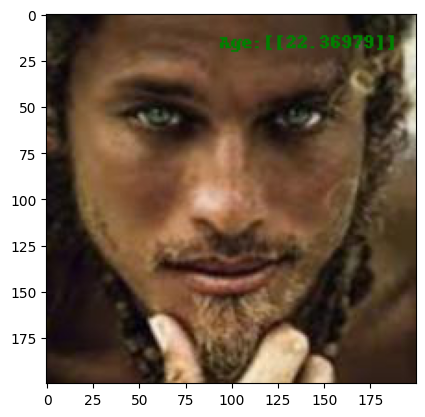

In [35]:
from PIL import Image, ImageDraw, ImageFont

# Crea una imagen en blanco
# Carga la imagen
img = Image.open('pru.jpg')

# Convierte la imagen a un array de numpy
img_array = np.array(img)
# Obtiene el objeto ImageDraw
draw = ImageDraw.Draw(img)
text = f"Age:{prediction}"
# Obtiene el ancho y la altura del texto
text_width, text_height = draw.textsize(text, font=None)

# Calcula las coordenadas para que el texto aparezca en la esquina superior derecha
x = img.width - text_width - 10
y = 10
# Dibuja el valor de la variable en la imagen
draw.text((x, y), str(f"Age:{prediction}"), font=None, fill='green')

# Guarda la imagen
img.save('my_image.png')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('my_image.png')
imgplot = plt.imshow(img)
plt.show()